In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [143]:
marketing = pd.read_csv("/content/marketing.csv")

In [144]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [145]:
# summary statistics
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [146]:
#missing values and data types
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [147]:
marketing.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [148]:
# change the 'converted' column data type to 'bool'
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['converted'].dtype)

bool


In [149]:
# creating new boolean columns
marketing['is_house_ads'] = np.where(
marketing['marketing_channel'] == 'House Ads', True, False
)
print(marketing.is_house_ads.head)

<bound method NDFrame.head of 0         True
1         True
2         True
3         True
4         True
         ...  
10032    False
10033    False
10034    False
10035    False
10036    False
Name: is_house_ads, Length: 10037, dtype: bool>


In [150]:
# mapping values to existing columns
channel_dict = {"House Ads": 1, "Instagram": 2,
                "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['marketing_channel']\
                                .map(channel_dict)
print(marketing['channel_code'].head(3))

0    1.0
1    1.0
2    1.0
Name: channel_code, dtype: float64


In [ ]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

In [ ]:
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])

In [ ]:
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

In [154]:
marketing['day_served'] = marketing['date_served'].dt.dayofweek

# How many users see marketing assest?

In [155]:
# Aggregate unique users that see ads by date
daily_users = marketing.groupby(['date_served'])\
                                ['user_id'].nunique()
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


Visualizing results

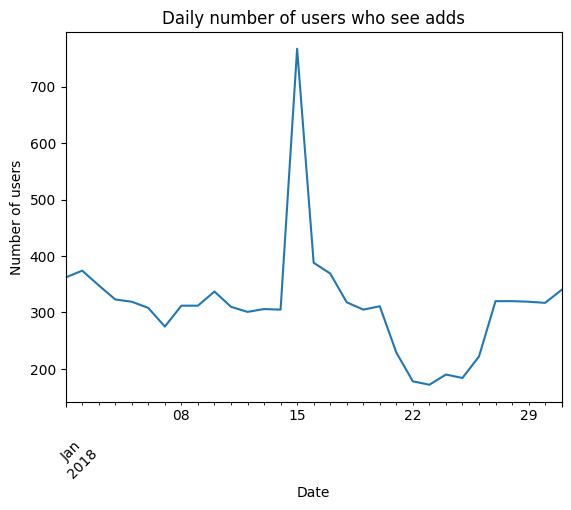

In [156]:
daily_users.plot()

plt.title('Daily number of users who see adds')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

Calculating conversion rate

In [157]:
subscribers = marketing[marketing['converted']==True]\
                       ['user_id'].nunique()
total = marketing['user_id'].nunique()
conv_rate = subscribers/total

print(round(conv_rate*100, 2), '%')

14.09 %


# Calculating retention rate

In [158]:
retained = marketing[marketing['is_retained']==True]\
                              ['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]\
                                 ['user_id'].nunique()
retention = retained/subscribers
print(round(retention*100, 2), '%')

65.83 %


# Segmenting

In [159]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained']== True]\
           .groupby(['subscribing_channel'])\
           ['user_id'].nunique()

print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [160]:
# Group by subscribing channel and calculate subscribers
subscribers = marketing[marketing['converted']==True]\
              .groupby(['subscribing_channel'])\
              ['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


Segementing results

In [161]:
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers) * 100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [162]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                          ['user_id'].nunique()
# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

language_conversion_rate = subscribers/total

print(language_conversion_rate)


language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


Comparing language conversion rates

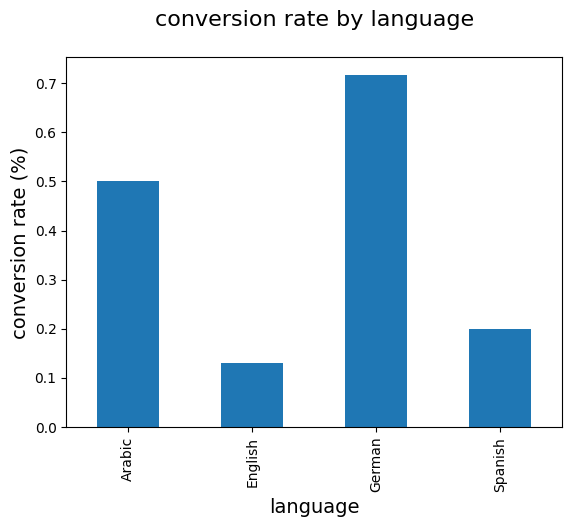

In [163]:
# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind='bar')
# Add a title and x and y-axis labels
plt.title('conversion rate by language\n', size=16)
plt.xlabel('language', size=14)
plt.ylabel('conversion rate (%)', size =14)
plt.show()

Calculating subscriber quality

In [164]:
# Group by language_displayed and count unique users
total = marketing.groupby(['date_subscribed'])['user_id']\
                  .nunique()
retained = marketing[marketing['is_retained']==True]\
             .groupby(['date_subscribed'])\
             ['user_id'].nunique()
daily_retention_rate = retained/total

In [165]:
# Reset index to turn the series into a DataFarme
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())

# Rename columns
daily_retention_rate.columns = ['date_subscribed',
                                'retention_rate']

visulazing data trended over time

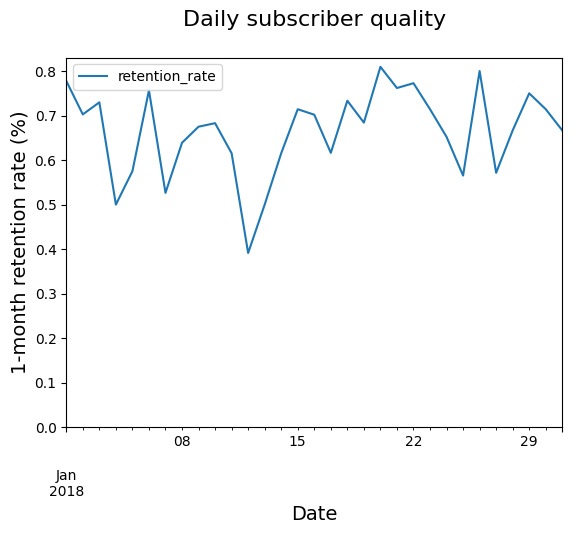

In [166]:
# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed',
                        'retention_rate')
# Add a title x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size =14)
# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [167]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [168]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served',
                              'conversion_rate']

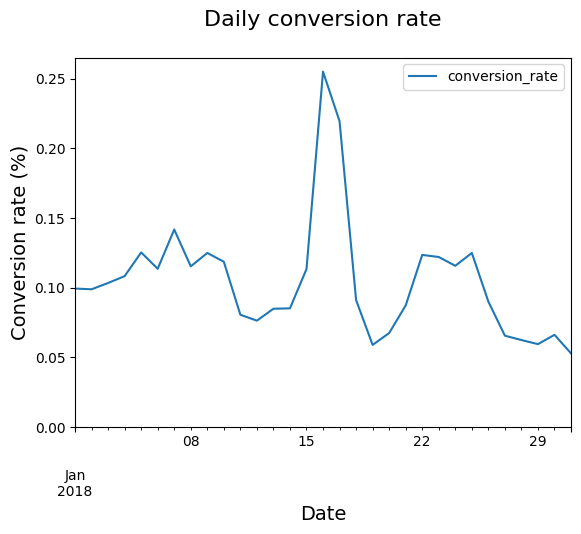

In [169]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served',
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [170]:
# Group by multiple columns
language = marketing.groupby(['date_served',
                              'language_preferred'])\
                              ['user_id'].count()

print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [171]:
#  unstacking after gorupby
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


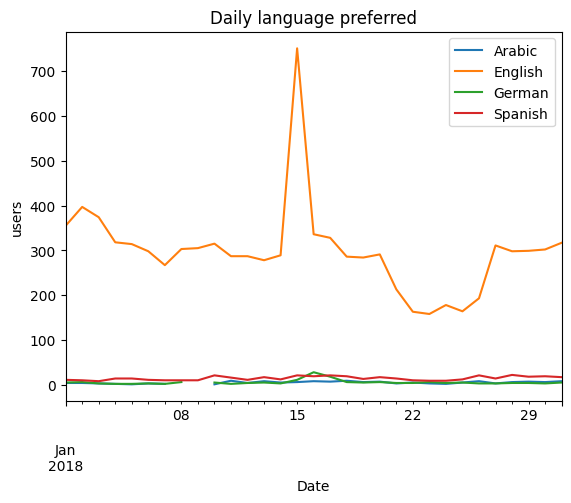

In [172]:
# plotting preferred language over time
language.plot()
plt.title('Daily language preferred')
plt.xlabel('Date')
plt.ylabel('users')
plt.legend(loc = 'upper right',
           labels = language.columns.values)
plt.show()

In [173]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred',
                                 'age_group'])\
                                 ['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


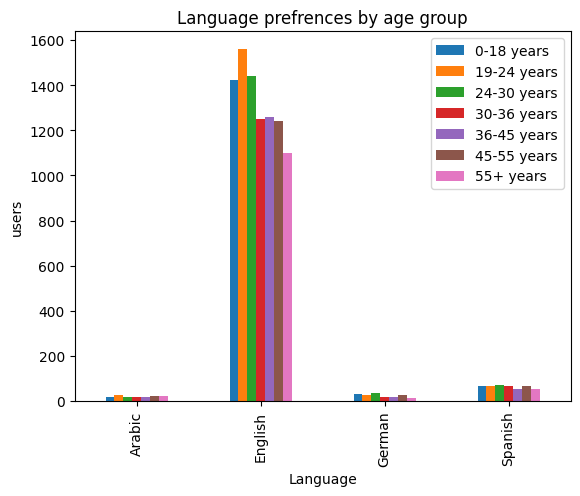

In [174]:
language_age.plot(kind='bar')
plt.title('Language prefrences by age group')
plt.xlabel('Language')
plt.ylabel('users')
plt.legend(loc = 'upper right',
           labels = language_age.columns.values)
plt.show()

In [175]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = column_conv/column_total

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate


In [176]:
print(daily_retention_rate)

   date_subscribed  retention_rate
0       2018-01-01        0.777778
1       2018-01-02        0.702703
2       2018-01-03        0.729730
3       2018-01-04        0.500000
4       2018-01-05        0.575000
5       2018-01-06        0.756757
6       2018-01-07        0.526316
7       2018-01-08        0.638889
8       2018-01-09        0.675000
9       2018-01-10        0.682927
10      2018-01-11        0.615385
11      2018-01-12        0.391304
12      2018-01-13        0.500000
13      2018-01-14        0.615385
14      2018-01-15        0.714286
15      2018-01-16        0.701923
16      2018-01-17        0.616279
17      2018-01-18        0.733333
18      2018-01-19        0.684211
19      2018-01-20        0.809524
20      2018-01-21        0.761905
21      2018-01-22        0.772727
22      2018-01-23        0.714286
23      2018-01-24        0.652174
24      2018-01-25        0.565217
25      2018-01-26        0.800000
26      2018-01-27        0.571429
27      2018-01-28  

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


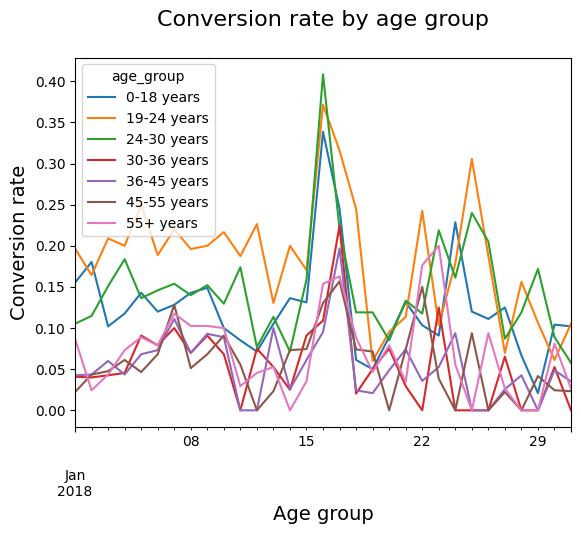

In [177]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [178]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n',
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

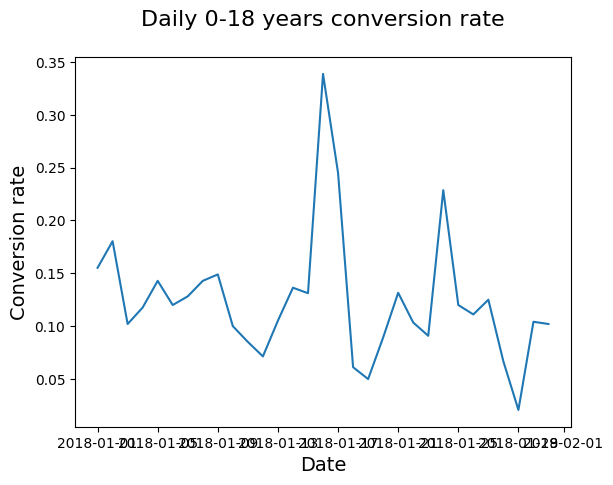

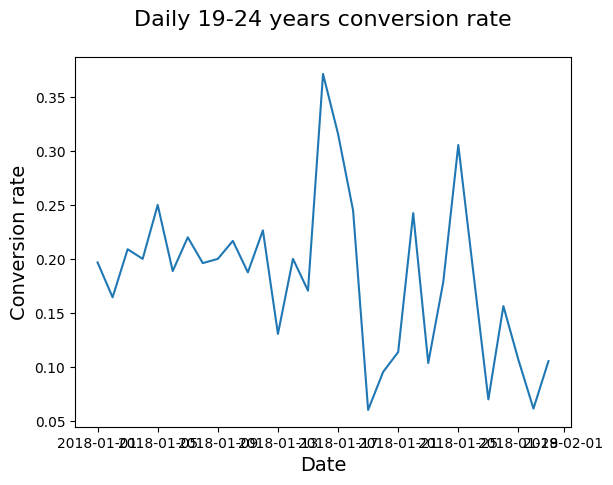

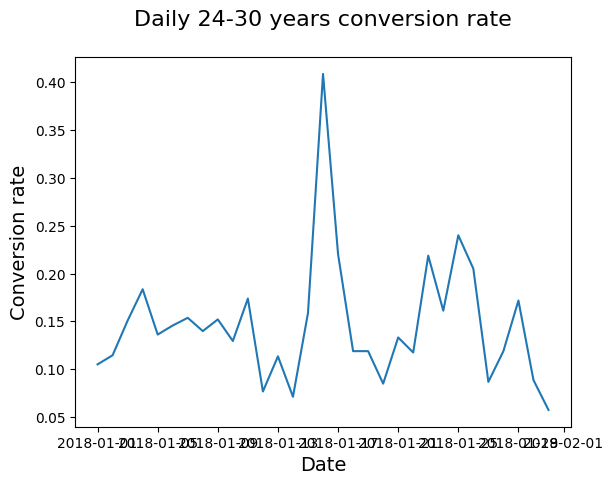

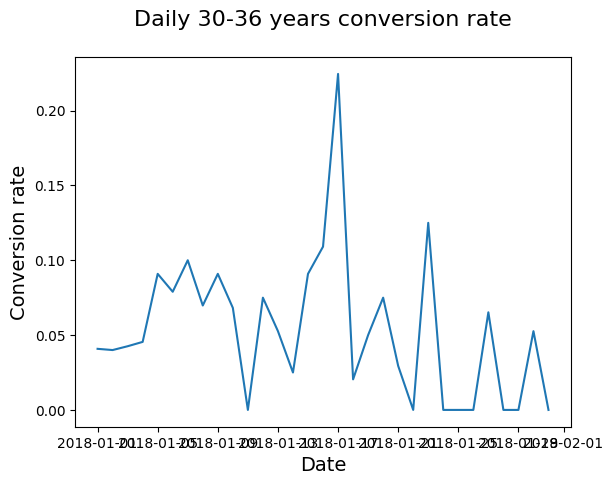

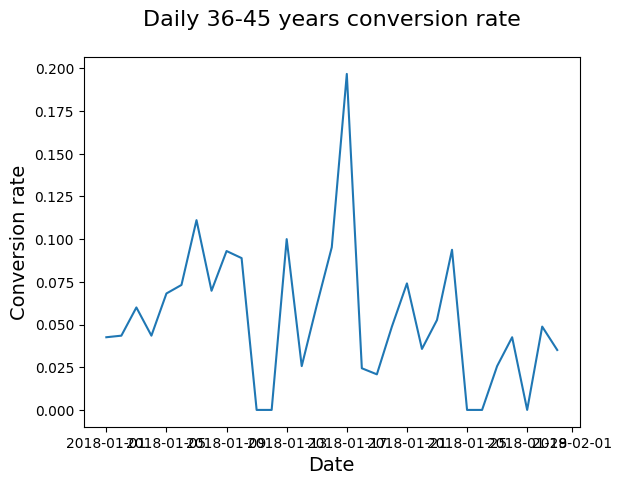

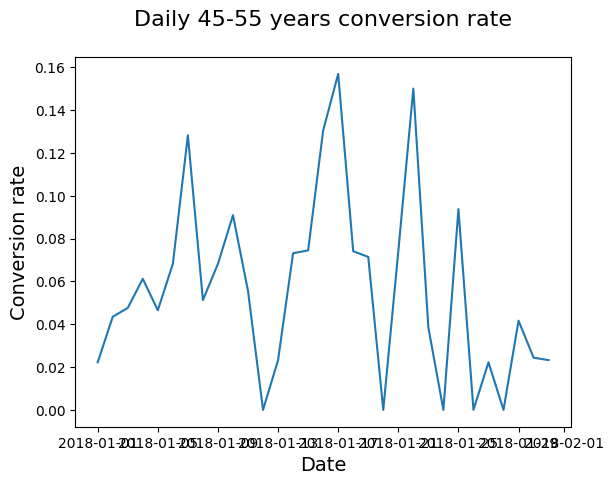

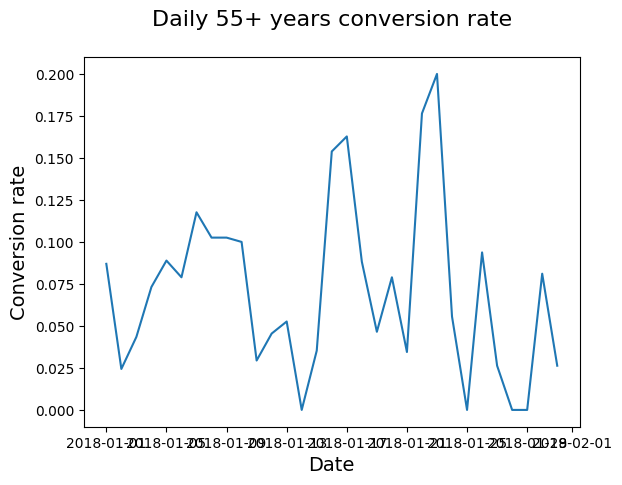

<Figure size 640x480 with 0 Axes>

In [179]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,
                                 ['date_served',
                                 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

In [180]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing,
                                     ['date_served',
                                     'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


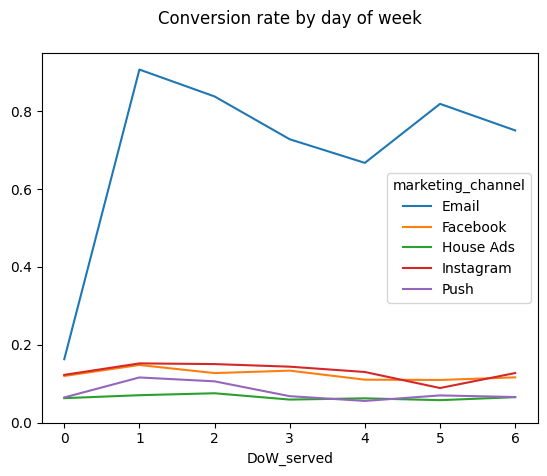

In [181]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served',
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

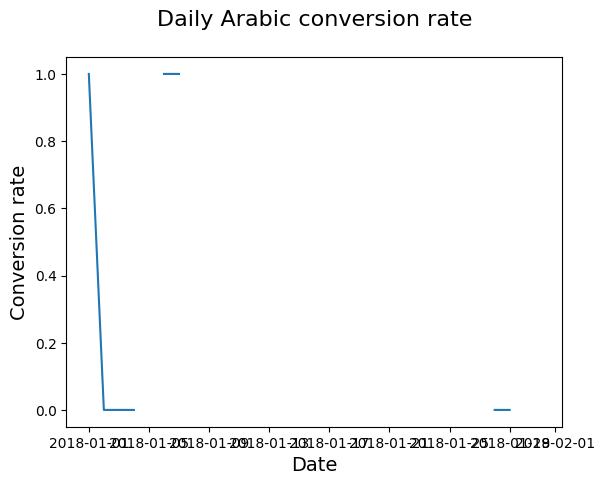

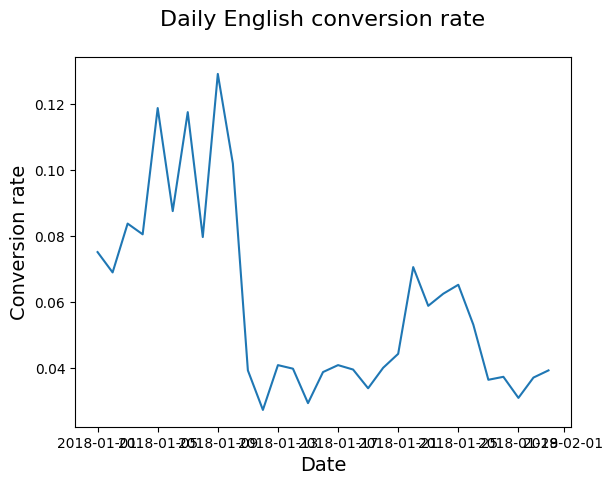

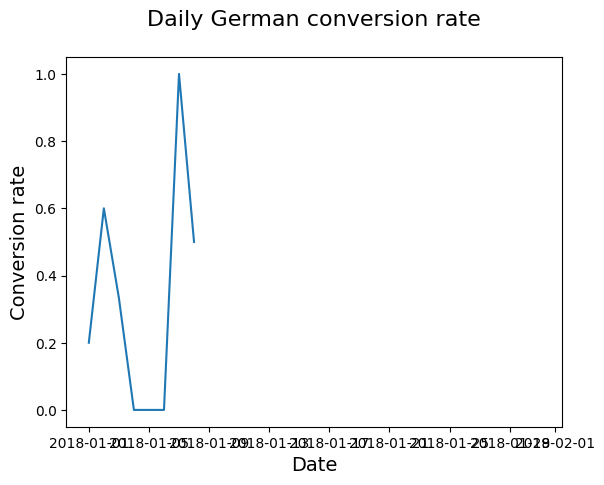

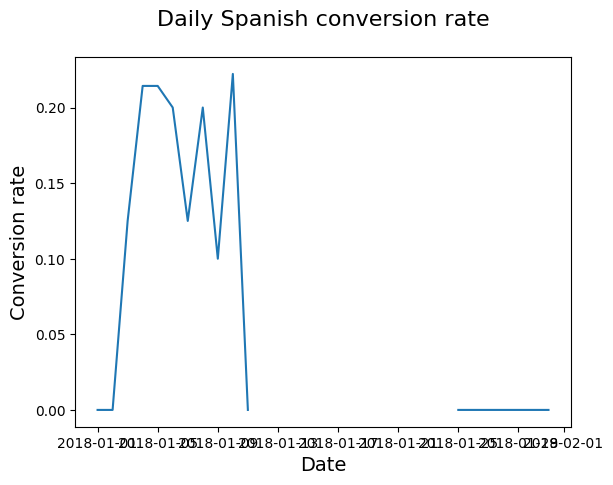

<Figure size 640x480 with 0 Axes>

In [182]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads,
                                    ['date_served',
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

In [183]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'],
    'Yes',
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


<ipython-input-183-829813fa999e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


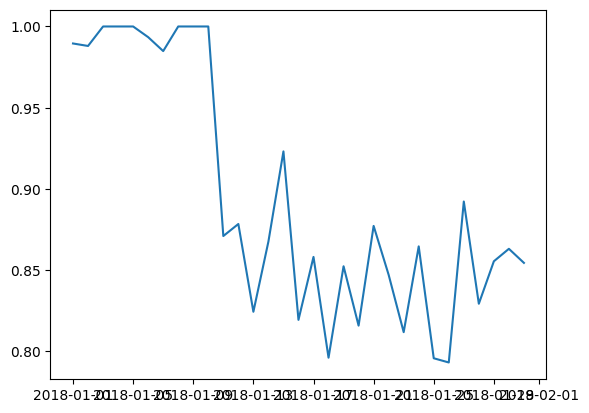

In [184]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'] )
plt.show()

# Hypothesis Testing
Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

In [185]:
cleaned_data = marketing.dropna(subset=['converted'])

# Filter data for the two variants
variant_personalization = cleaned_data[cleaned_data['variant'] == 'personalization']
variant_control = cleaned_data[cleaned_data['variant'] == 'control']

# Convert the 'converted' column to integers
variant_personalization['converted'] = variant_personalization['converted'].astype(int)
variant_control['converted'] = variant_control['converted'].astype(int)

# Perform a t-test to compare the conversion rates
t_stat, p_value = stats.ttest_ind(variant_personalization['converted'], variant_control['converted'], equal_var=False)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')


t-statistic: 10.7552070527573
p-value: 8.078989463863856e-27


<ipython-input-185-0c5eed00e643>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_personalization['converted'] = variant_personalization['converted'].astype(int)
<ipython-input-185-0c5eed00e643>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_control['converted'] = variant_control['converted'].astype(int)


These results indicate that there is a statistically significant difference between the conversion rates of the "personalization" and "control" variants. Given the extremely low p-value (much less than 0.05), we can reject the null hypothesis and conclude that the difference in conversion rates is not due to random chance.